Data sourced from [moneypuck.com](https://moneypuck.com/data.htm)

# Packages

In [161]:
import glob
import polars as pl
import matplotlib.pyplot as plt

# Read Data

In [162]:
df: pl.DataFrame = pl.concat(
    [pl.read_csv(csv_file) for csv_file in glob.glob("./Data/*.csv")],
    how="vertical"
)

df.sample(n=5, seed=20)

playerId,season,name,team,position,situation,games_played,icetime,xGoals,goals,unblocked_shot_attempts,xRebounds,rebounds,xFreeze,freeze,xOnGoal,ongoal,xPlayStopped,playStopped,xPlayContinuedInZone,playContinuedInZone,xPlayContinuedOutsideZone,playContinuedOutsideZone,flurryAdjustedxGoals,lowDangerShots,mediumDangerShots,highDangerShots,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,blocked_shot_attempts,penalityMinutes,penalties
i64,i64,str,str,str,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
8480373,2020,"""Josef Korenar""","""S.J""","""G""","""all""",10,29510.0,21.33,26.0,476.0,18.21,16.0,58.91,73.0,255.31,258.0,7.46,6.0,142.81,101.0,103.8,131.0,20.61,271.0,66.0,16.0,7.71,8.16,5.45,10.0,9.0,7.0,123.0,0.0,0.0
8467913,2009,"""Alex Auld""","""NYR""","""G""","""other""",24,2764.0,3.71,4.0,66.0,2.4,2.0,7.91,8.0,37.82,36.0,1.02,1.0,20.16,17.0,16.6,18.0,3.52,40.0,8.0,4.0,1.4,0.94,1.37,1.0,2.0,1.0,14.0,0.0,0.0
8481668,2024,"""Arturs Silovs""","""VAN""","""G""","""4on5""",10,2713.0,3.94,4.0,63.0,2.67,3.0,6.35,5.0,30.32,30.0,0.23,0.0,19.0,15.0,9.98,16.0,3.87,31.0,7.0,5.0,1.02,0.79,2.13,0.0,1.0,3.0,20.0,0.0,0.0
8475660,2019,"""Cam Talbot""","""CGY""","""G""","""other""",26,1792.0,2.24,3.0,47.0,1.82,1.0,5.32,7.0,27.11,32.0,0.6,0.0,17.03,17.0,10.8,11.0,2.17,33.0,3.0,3.0,1.07,0.33,0.85,2.0,0.0,1.0,8.0,0.0,0.0
8471239,2014,"""Cory Schneider""","""N.J""","""G""","""all""",69,235436.0,166.23,148.0,3436.0,128.56,111.0,433.73,487.0,1914.2,1982.0,51.2,51.0,1055.58,787.0,788.75,1038.0,160.49,1978.0,516.0,140.0,56.67,62.75,46.8,48.0,57.0,43.0,802.0,0.0,0.0


# Feature Selection

- I could explore feature selection models.
- For now I've chosen features I think are important based off my own knowledge of the NHL and hockey.

In [163]:
# include aggregate stats of all situations (5on5, 5on4, 4on5, etc.)
df = df.filter(pl.col('situation') == 'all')

# # i could potentially explore feature selection models
df = df.select([
    "season",              # the year of the season played
    "name",                # the goalie's name
    "games_played",        # total number of games played for a season
    "xGoals",              # total number of goals expected to be allowed
    "goals",               # total number of goals actually allowed
    "xRebounds",           # total number of rebounds expected to allow
    "rebounds",            # total number of rebounds given from shots on goal
    "ongoal",              # total number of shots on goal faced
    "lowDangerxGoals",     # goals expected to allow from low danger shots
    "mediumDangerxGoals",  # goals expected to allow from medium danger shots
    "highDangerxGoals",    # goals expected to allow from high danger shots
    "lowDangerGoals",      # goals actually allowed from low danger shots
    "mediumDangerGoals",   # goals actually allowed from medium danger shots
    "highDangerGoals"      # goals actually allowed from high danger shots
])

df.sample(n=5, seed=20)

season,name,games_played,xGoals,goals,xRebounds,rebounds,ongoal,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2020,"""Sergei Bobrovsky""",31,79.88,88.0,60.09,85.0,933.0,25.58,28.56,25.73,25.0,33.0,30.0
2009,"""Steve Mason""",57,127.82,163.0,104.78,88.0,1614.0,46.36,42.75,38.7,59.0,59.0,45.0
2024,"""Connor Hellebuyck""",60,155.87,120.0,119.89,195.0,1576.0,51.63,51.25,52.99,50.0,33.0,37.0
2019,"""Elvis Merzlikins""",32,68.84,71.0,58.71,57.0,919.0,29.16,25.36,14.33,32.0,27.0,12.0
2014,"""Cory Schneider""",69,166.23,148.0,128.56,111.0,1982.0,56.67,62.75,46.8,48.0,57.0,43.0


In [164]:
df.describe()

statistic,season,name,games_played,xGoals,goals,xRebounds,rebounds,ongoal,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1598.0,"""1598""",1598.0,1598.0,1598.0,1598.0,1598.0,1598.0,1598.0,1598.0,1598.0,1598.0,1598.0,1598.0
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",2016.295369,null,27.143304,68.6452,68.976846,52.602522,58.82791,765.296621,23.096902,24.473191,21.074975,23.997497,24.660826,20.318523
"""std""",4.894797,null,20.523826,54.021054,52.297402,41.420043,48.698128,604.477073,18.16468,19.10398,17.369629,18.498625,18.88664,16.596219
"""min""",2008.0,"""Aaron Dell""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",2012.0,null,7.0,17.51,20.0,13.04,14.0,191.0,5.75,6.36,5.1,7.0,7.0,5.0
"""50%""",2016.0,null,25.0,59.4,62.0,46.35,50.0,669.0,20.52,21.83,17.85,22.0,22.0,17.0
"""75%""",2021.0,null,43.0,108.82,110.0,83.48,92.0,1207.0,36.45,39.3,33.84,38.0,39.0,33.0
"""max""",2024.0,"""Zane McIntyre""",77.0,217.67,209.0,168.82,222.0,2375.0,75.81,83.57,78.93,76.0,91.0,75.0


# Feature Engineering

In [165]:
# creating a goals against average feature
df = df.with_columns(
    goals_against_avg=pl.col("goals") / pl.col("games_played")
)

# +/- goals allowed vs expected
df = df.with_columns(
    goals_vs_expected=pl.col("goals") - pl.col("xGoals")
)

# +/- rebounds alloed vs expected
df = df.with_columns(
    rebounds_vs_expected=pl.col("rebounds") - pl.col("xRebounds")
)

# save percentage for the season
df = df.with_columns(
    save_percentage=1 - (pl.col("goals") / pl.col("ongoal"))
)

In [166]:
# creating the target variable (is the vezina winner)
df = df.with_columns(
    is_vezina=0
)

vezina_map = {
    2008: "Tim Thomas",
    2009: "Ryan Miller",
    2010: "Tim Thomas",
    2011: "Henrik Lundqvist",
    2012: "Sergei Bobrovsky",
    2013: "Tuukka Rask",
    2014: "Carey Price",
    2015: "Braden Holtby",
    2016: "Sergei Bobrovsky",
    2017: "Pekka Rinne",
    2018: "Andrei Vasilevskiy",
    2019: "Connor Hellebuyck",
    2020: "Marc-Andre Fleury",
    2021: "Igor Shesterkin",
    2022: "Linus Ullmark",
    2023: "Connor Hellebuyck",
}

for season, player in vezina_map.items():
    df = df.with_columns(
        pl.when((pl.col("season") == season) & (pl.col("name") == player))
        .then(1)
        .otherwise(pl.col("is_vezina"))
        .alias("is_vezina")
    )

df.filter(pl.col("is_vezina") == 1)

season,name,games_played,xGoals,goals,xRebounds,rebounds,ongoal,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,goals_against_avg,goals_vs_expected,rebounds_vs_expected,save_percentage,is_vezina
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32
2012,"""Sergei Bobrovsky""",38,80.86,74.0,71.39,74.0,1084.0,30.8,30.66,19.39,26.0,29.0,19.0,1.947368,-6.86,2.61,0.931734,1
2013,"""Tuukka Rask""",58,125.08,115.0,105.34,96.0,1641.0,47.09,46.17,31.82,46.0,29.0,40.0,1.982759,-10.08,-9.34,0.929921,1
2011,"""Henrik Lundqvist""",62,148.83,123.0,118.77,109.0,1753.0,54.33,52.12,42.38,51.0,36.0,36.0,1.983871,-25.83,-9.77,0.929835,1
2010,"""Tim Thomas""",57,151.56,112.0,116.95,105.0,1811.0,52.53,56.15,42.87,33.0,41.0,38.0,1.964912,-39.56,-11.95,0.938156,1
2014,"""Carey Price""",66,163.16,130.0,133.31,133.0,1953.0,57.84,59.11,46.21,44.0,41.0,45.0,1.969697,-33.16,-0.31,0.933436,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2009,"""Ryan Miller""",69,179.38,150.0,139.69,118.0,2098.0,67.3,70.4,41.69,59.0,51.0,40.0,2.173913,-29.38,-21.69,0.928503,1
2008,"""Tim Thomas""",53,137.13,112.0,104.48,103.0,1664.0,47.01,47.37,42.75,33.0,45.0,34.0,2.113208,-25.13,-1.48,0.932692,1
2020,"""Marc-Andre Fleury""",36,88.92,71.0,68.06,96.0,989.0,29.09,30.91,28.92,20.0,30.0,21.0,1.972222,-17.92,27.94,0.92821,1


In [167]:
df.sample(n=5, seed=20)

season,name,games_played,xGoals,goals,xRebounds,rebounds,ongoal,lowDangerxGoals,mediumDangerxGoals,highDangerxGoals,lowDangerGoals,mediumDangerGoals,highDangerGoals,goals_against_avg,goals_vs_expected,rebounds_vs_expected,save_percentage,is_vezina
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i32
2020,"""Sergei Bobrovsky""",31,79.88,88.0,60.09,85.0,933.0,25.58,28.56,25.73,25.0,33.0,30.0,2.83871,8.12,24.91,0.905681,0
2009,"""Steve Mason""",57,127.82,163.0,104.78,88.0,1614.0,46.36,42.75,38.7,59.0,59.0,45.0,2.859649,35.18,-16.78,0.899009,0
2024,"""Connor Hellebuyck""",60,155.87,120.0,119.89,195.0,1576.0,51.63,51.25,52.99,50.0,33.0,37.0,2.0,-35.87,75.11,0.923858,0
2019,"""Elvis Merzlikins""",32,68.84,71.0,58.71,57.0,919.0,29.16,25.36,14.33,32.0,27.0,12.0,2.21875,2.16,-1.71,0.922742,0
2014,"""Cory Schneider""",69,166.23,148.0,128.56,111.0,1982.0,56.67,62.75,46.8,48.0,57.0,43.0,2.144928,-18.23,-17.56,0.925328,0


# Data Visualization

In [168]:
vezina_df: pl.DataFrame = df.filter(
    pl.col("is_vezina") == 1
)

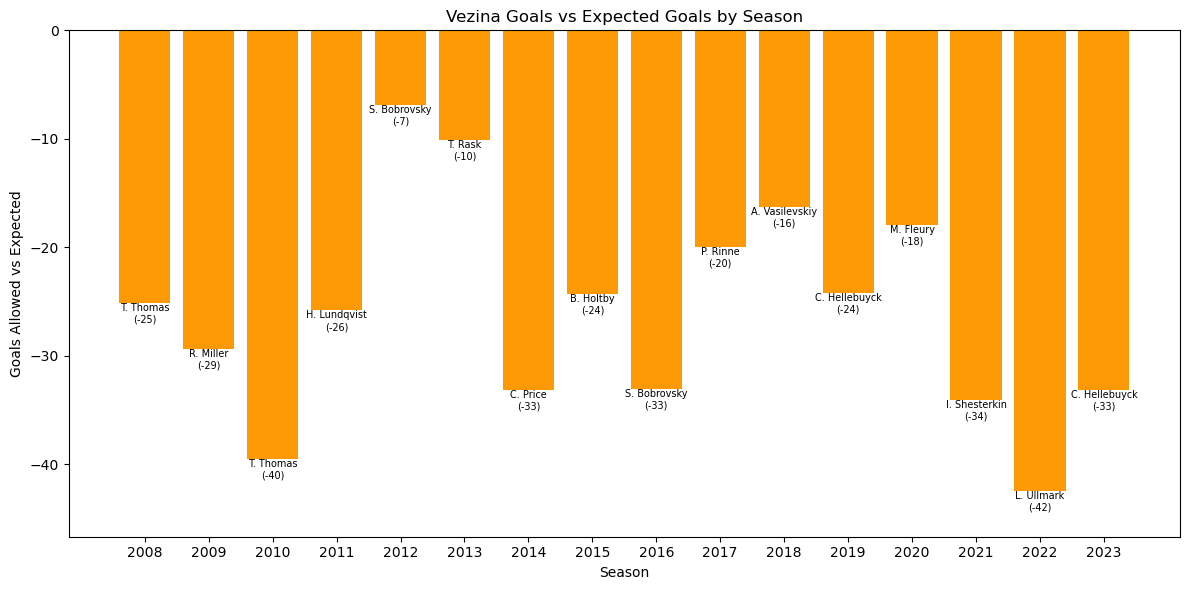

In [169]:
plt.figure(figsize=(12, 6))

bars = plt.bar(
    vezina_df["season"].to_list(),
    vezina_df["goals_vs_expected"].to_list(),
    color="#fc9905"
)
plt.title("Vezina Goals vs Expected Goals by Season")
plt.xlabel("Season")
plt.ylabel("Goals Allowed vs Expected")
plt.xticks(vezina_df["season"].to_list())

for idx, season in enumerate(vezina_df["season"].to_list()):
    gve: float = vezina_df.filter(pl.col("season") == season)["goals_vs_expected"].to_list()[0]
    name: str = vezina_df.filter(pl.col("season") == season)["name"].to_list()[0]
    plt.text(
        season, gve,
        f"{name.split()[0][0]}. {name.split()[-1]}\n({gve:.0f})",
        fontsize=7,
        ha="center", va="top"
    )

plt.margins(y=0.1)
plt.tight_layout()
plt.show()

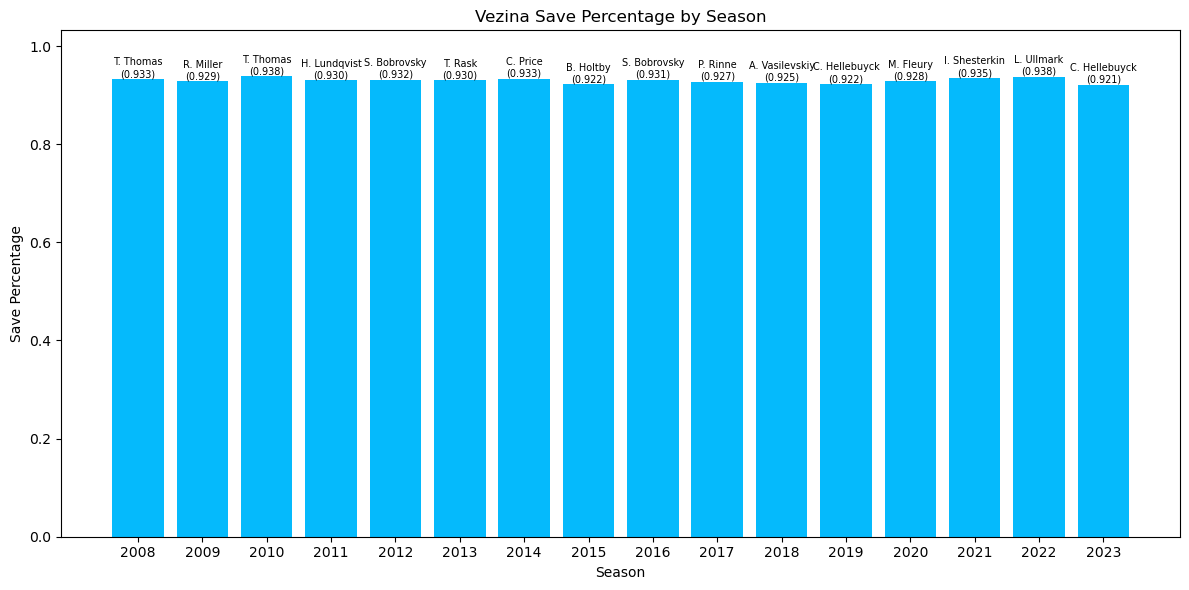

In [170]:
plt.figure(figsize=(12, 6))

bars = plt.bar(
    vezina_df["season"].to_list(), 
    vezina_df["save_percentage"].to_list(),
    color="#05bafc"
)
plt.title("Vezina Save Percentage by Season")
plt.xlabel("Season")
plt.ylabel("Save Percentage")
plt.xticks(vezina_df["season"].to_list())

for idx, season in enumerate(vezina_df["season"].to_list()):
    svpt: float = vezina_df.filter(pl.col("season") == season)["save_percentage"].to_list()[0]
    name: str = vezina_df.filter(pl.col("season") == season)["name"].to_list()[0]
    plt.text(
        season, svpt, 
        f"{name.split()[0][0]}. {name.split()[-1]}\n({svpt:.3f})", 
        fontsize=7,
        ha="center", va="bottom"
    )

plt.margins(y=0.1)
plt.tight_layout()
plt.show()